<a href="https://colab.research.google.com/github/jinsyabeycg/BITS-AIML-Mtech-V2/blob/master/DNN_Assignment01_group148.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group No

## Group Member Names:
1. Atharva Mahesh Kakade
2. Jinsy Abey
3. Nimeshkumar Vishnulal Patel
4. Sunil Pandey

# 1. Import the required libraries

In [ ]:
##---------Type the code below this line------------------##
# libraries
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from keras.optimizers import RMSprop, Adam
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
random.seed(42)
np.random.seed(42)

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
(train_dataset, test_dataset) , ds_info  = tfds.load('fashion_mnist',split=['train', 'test'], with_info=True, as_supervised=True, shuffle_files=False)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.HBRPOI_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.HBRPOI_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



In [ ]:
print(f"Dataset name: {ds_info.name}")
print(f"Description: {ds_info.description}")
print(f"Number of training examples: {ds_info.splits['train'].num_examples}")
print(f"Number of test examples: {ds_info.splits['test'].num_examples}")

# FashionMNIST images are 28x28 grayscale
print(f"Original Image shape: {ds_info.features['image'].shape}")
print(f"Number of classes (labels): {ds_info.features['label'].num_classes}")
print(f"Class names: {ds_info.features['label'].names}")

Dataset name: fashion_mnist
Description: Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
Number of training examples: 60000
Number of test examples: 10000
Original Image shape: (28, 28, 1)
Number of classes (labels): 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


<h2>Converting Training and testing dataset to X_train/Y_train and X_test/Y_test numpy arrays</h2>

In [ ]:
# converting to Training and Testing dataset
X_train_list = []
y_train_list = []
for image, label in tfds.as_numpy(train_dataset):
    X_train_list.append(image)
    y_train_list.append(label)

X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

X_test_list = []
y_test_list = []
for image, label in tfds.as_numpy(test_dataset):
    X_test_list.append(image)
    y_test_list.append(label)

X_test = np.array(X_test_list)
y_test = np.array(y_test_list)

<h2>Visualize the Data</h2>

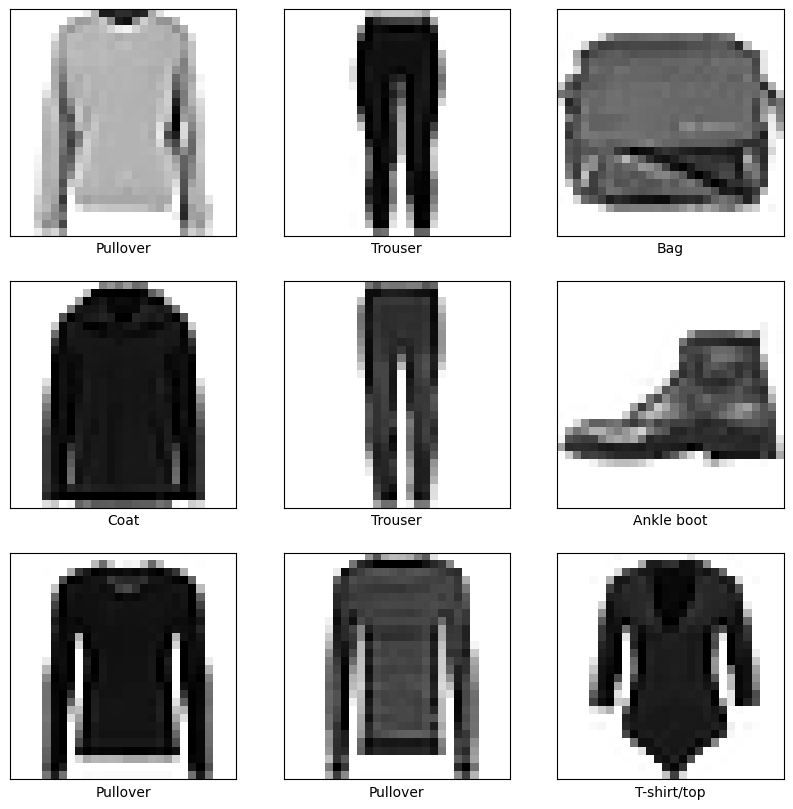

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
## to remove duplicate data
# There are no duplicates

## to impute or remove missing data
## to remove data inconsistencies

## Encode categorical data - Datas are in integer format

## Normalize the data
## Feature Engineering

## Stop word removal, lemmatiation, stemming, vectorizationcheck any duplicates
# Data is not in Test format

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:
# Normalize training images
X_train = X_train.astype('float32') / 255
X_train = X_train.reshape((60000, 28*28))    # reshape the input set to size 28*28
# Normalize test images
X_test = X_test.astype('float32') / 255
X_test = X_test.reshape((10000, 28*28))    # reshape the input set to size 28*28

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## 3.3 Split the data into training set and testing set

<h2>Already splitted the data into training and testing in the above steps</h2>

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [ ]:
print(f"Original X_train dtype: {X_train.dtype}")
print(f"Original X_train shape: {X_train.shape}")
print(f"Original X_test dtype: {X_test.dtype}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Original y_train shape: {y_train.shape}")
print(f"Original y_test shape: {y_test.shape}")

print(f"\nNormalized X_train dtype: {X_train.dtype}")
print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Normalized X_test dtype: {X_test.dtype}")
print(f"Reshaped X_test shape: {X_test.shape}")
print(f"Normalized y_train shape: {y_train.shape}")
print(f"Reshaped y_train shape: {y_test.shape}")


Original X_train dtype: float32
Original X_train shape: (60000, 784)
Original X_test dtype: float32
Original X_test shape: (10000, 784)
Original y_train shape: (60000, 10)
Original y_test shape: (10000, 10)

Normalized X_train dtype: float32
Reshaped X_train shape: (60000, 784)
Normalized X_test dtype: float32
Reshaped X_test shape: (10000, 784)
Normalized y_train shape: (60000, 10)
Reshaped y_train shape: (10000, 10)


<h2>Sample Data set view</h2>

In [ ]:
# print a sample data

print('Xtrain \n', X_train[10,10])
print('Xtest \n', X_test[10,10])
print('Ytrain \n', y_train[10,])
print('Ytest \n', y_test[10,])

Xtrain 
 0.3882353
Xtest 
 0.6313726
Ytrain 
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
dnnModel = models.Sequential()

In [ ]:
# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer
dnnModel.add(layers.Dense(30, activation='relu'))

# Layer 4 = output layer
# number of neurons = number of classes = 10
dnnModel.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
dnnModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
h  = dnnModel.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4417 - loss: 1.6176 - val_accuracy: 0.7587 - val_loss: 0.6854
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7659 - loss: 0.6622 - val_accuracy: 0.7942 - val_loss: 0.5780
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8010 - loss: 0.5663 - val_accuracy: 0.8155 - val_loss: 0.5174
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8165 - loss: 0.5176 - val_accuracy: 0.8193 - val_loss: 0.5092
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8282 - loss: 0.4927 - val_accuracy: 0.8275 - val_loss: 0.4809
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8339 - loss: 0.4698 - val_accuracy: 0.8368 - val_loss: 0.4593
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8434 - loss: 0.4468 - val_accuracy: 0.8498 - val_loss: 0.4288
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8474 - loss: 0.4372 - val_accuracy: 0.

<h2>Justify your choice of optimizers and regulizations used and the hyperparameters tuned</h2>


<h2>Justifiction:
Right now optimizer used Stochastic Gradient Descent SGD. With default settings, without any hyperparameter settings and without any regularization. That will be done in the below steps </h2>

# 6. Test the model - 0.5 marks


In [ ]:
testLoss, testAccuracy = dnnModel.evaluate( X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3995


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])
print('Final validation loss \t', h.history['val_loss'][-1])
print('Final validation accuracy ', h.history['val_accuracy'][-1])

Final training loss 	 0.3398788273334503
Final training accuracy  0.878333330154419
Final validation loss 	 0.37369051575660706
Final validation accuracy  0.8659999966621399


In [ ]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted = dnnModel.predict(X_test)
Ypredicted = np.argmax(np.round(Ypredicted),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


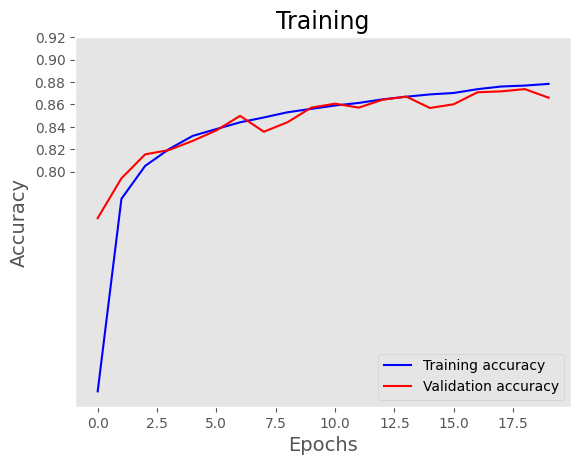

In [ ]:
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']

# plot loss and accuracy
epochs = range(len(accuracy))

plt.style.use('ggplot')
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.yticks((0.8,0.82,0.84,0.86,0.88,.90,0.92))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()

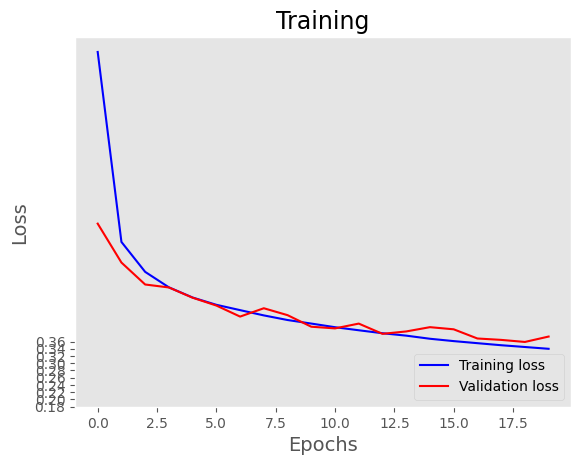

In [ ]:
loss = h.history['loss']
val_loss = h.history['val_loss']

# plot loss and accuracy
epochs = range(len(loss))

plt.style.use('ggplot')
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.yticks((0.18,0.2,0.22,0.24,0.26,.28,0.3,0.32,0.34,0.36))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()

In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.41112303733825684
Testing accuracy  0.8536999821662903


[[897   0  13  26   0   0  55   0   9   0]
 [ 14 955   2  26   2   0   1   0   0   0]
 [ 71   0 864   8  35   0  19   0   3   0]
 [ 92   6  11 848  25   1  14   0   3   0]
 [ 98   0 226  26 615   0  28   0   7   0]
 [ 13   0   0   0   0 943   0  34   2   8]
 [291   1 155  22  46   0 469   0  16   0]
 [  7   0   0   0   0  30   0 955   0   8]
 [ 27   0   8   5   0   4   2   5 949   0]
 [ 21   0   0   0   0  23   0  60   1 895]]


<Axes: >

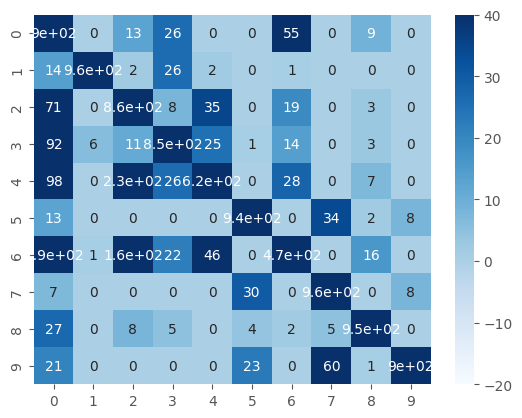

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytrue, Ypredicted)
print(cm)
df_cm = pd.DataFrame(cm)

#plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, vmin=-20, vmax=40, cmap="Blues")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypredicted))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71      1000
           1       0.99      0.95      0.97      1000
           2       0.68      0.86      0.76      1000
           3       0.88      0.85      0.86      1000
           4       0.85      0.61      0.71      1000
           5       0.94      0.94      0.94      1000
           6       0.80      0.47      0.59      1000
           7       0.91      0.95      0.93      1000
           8       0.96      0.95      0.95      1000
           9       0.98      0.90      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000



# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



<h2>8.1. Decreasing one layer</h2>

In [ ]:
dnnModel_1less = models.Sequential()

In [ ]:
# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel_1less.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnnModel_1less.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer removed this layer
#dnnModel_1less.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer. So this will be layer 3
# number of neurons = number of classes = 10
dnnModel_1less.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dnnModel_1less.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,920 (167.66 KB)

 Trainable params: 42,920 (167.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dnnModel_1less.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
h_1less  = dnnModel_1less.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5273 - loss: 1.4366 - val_accuracy: 0.7717 - val_loss: 0.6784
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7790 - loss: 0.6464 - val_accuracy: 0.8172 - val_loss: 0.5461
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8128 - loss: 0.5475 - val_accuracy: 0.8215 - val_loss: 0.5066
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8259 - loss: 0.5027 - val_accuracy: 0.8240 - val_loss: 0.4959
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8366 - loss: 0.4753 - val_accuracy: 0.8272 - val_loss: 0.4763
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8397 - loss: 0.4620 - val_accuracy: 0.8417 - val_loss: 0.4438
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8444 - loss: 0.4451 - val_accuracy: 0.8460 - val_loss: 0.4315
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8505 - loss: 0.4277 - val_accuracy: 0.

In [ ]:
testLoss_1les, testAccuracy_1less = dnnModel_1less.evaluate( X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3903


In [ ]:
print('Final training loss \t', h_1less.history['loss'][-1])
print('Final training accuracy ', h_1less.history['accuracy'][-1])
print('Final validation loss \t', h_1less.history['val_loss'][-1])
print('Final validation accuracy ', h_1less.history['val_accuracy'][-1])

Final training loss 	 0.35715019702911377
Final training accuracy  0.8753888607025146
Final validation loss 	 0.3643869161605835
Final validation accuracy  0.8698333501815796


In [ ]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue_1less = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted_1less = dnnModel_1less.predict(X_test)
Ypredicted_1less = np.argmax(np.round(Ypredicted_1less),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


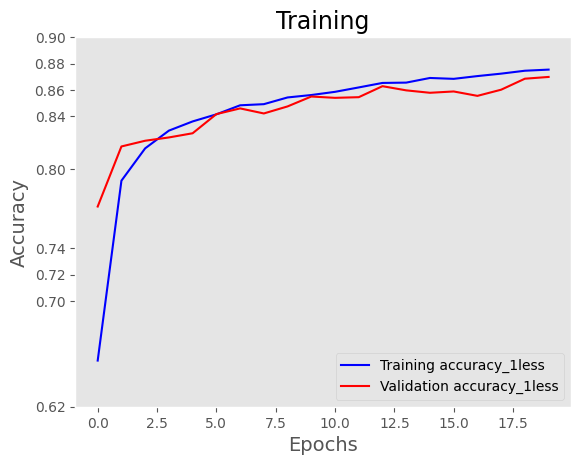

In [ ]:
accuracy_1less = h_1less.history['accuracy']
val_accuracy_1less = h_1less.history['val_accuracy']

# plot loss and accuracy
epochs_1less = range(len(accuracy_1less))

plt.style.use('ggplot')
plt.plot(epochs_1less, accuracy_1less, 'blue', label='Training accuracy_1less')
plt.plot(epochs_1less, val_accuracy_1less, 'red', label='Validation accuracy_1less')
plt.yticks((0.62,0.7,0.72,0.74,0.8,0.84,0.86,0.88,0.9))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()

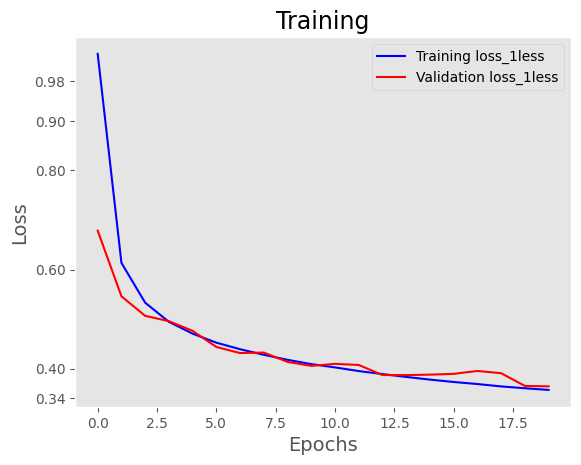

In [ ]:
loss_1less = h_1less.history['loss']
val_loss_1less = h_1less.history['val_loss']

# plot loss and accuracy
epochs_1less = range(len(loss_1less))

plt.style.use('ggplot')
plt.plot(epochs_1less, loss_1less, 'blue', label='Training loss_1less')
plt.plot(epochs_1less, val_loss_1less, 'red', label='Validation loss_1less')
plt.yticks((0.34,0.4,0.6,0.8,0.9,0.98))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='upper right')
plt.grid(None)

plt.show()

<h2>8.2.Increase one layer</h2>

In [ ]:
dnnModel_1more = models.Sequential()

In [ ]:
# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel_1more.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnnModel_1more.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer removed this layer
dnnModel_1more.add(layers.Dense(30, activation='relu'))

# Layer 4 = hidden layer removed this layer
dnnModel_1more.add(layers.Dense(20, activation='relu'))

# Layer 5 = output layer.
# number of neurons = number of classes = 10
dnnModel_1more.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dnnModel_1more.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,970 (175.66 KB)

 Trainable params: 44,970 (175.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dnnModel_1more.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
h_1more  = dnnModel_1more.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3635 - loss: 1.7976 - val_accuracy: 0.7358 - val_loss: 0.7168
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7594 - loss: 0.6691 - val_accuracy: 0.8027 - val_loss: 0.5681
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8081 - loss: 0.5482 - val_accuracy: 0.8145 - val_loss: 0.5253
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8258 - loss: 0.4909 - val_accuracy: 0.8213 - val_loss: 0.5045
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8313 - loss: 0.4665 - val_accuracy: 0.8445 - val_loss: 0.4387
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8426 - loss: 0.4446 - val_accuracy: 0.8467 - val_loss: 0.4340
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8485 - loss: 0.4315 - val_accuracy: 0.8540 - val_loss: 0.4121
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8551 - loss: 0.4164 - val_accuracy: 0.

In [ ]:
testLoss_1more, testAccuracy_1more = dnnModel_1more.evaluate( X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8451 - loss: 0.4130


In [ ]:
print('Final training loss \t', h_1more.history['loss'][-1])
print('Final training accuracy ', h_1more.history['accuracy'][-1])
print('Final validation loss \t', h_1more.history['val_loss'][-1])
print('Final validation accuracy ', h_1more.history['val_accuracy'][-1])

Final training loss 	 0.33445703983306885
Final training accuracy  0.8787962794303894
Final validation loss 	 0.3884333074092865
Final validation accuracy  0.8558333516120911


In [ ]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue_1more = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted_1more = dnnModel_1more.predict(X_test)
Ypredicted_1more = np.argmax(np.round(Ypredicted_1more),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


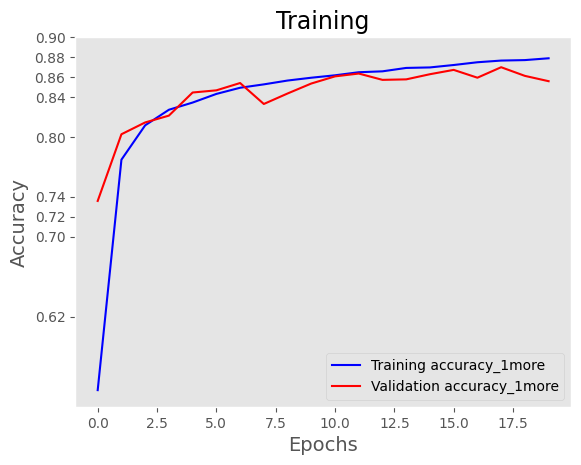

In [ ]:
accuracy_1more = h_1more.history['accuracy']
val_accuracy_1more = h_1more.history['val_accuracy']

# plot loss and accuracy
epochs_1more = range(len(accuracy_1more))

plt.style.use('ggplot')
plt.plot(epochs_1more, accuracy_1more, 'blue', label='Training accuracy_1more')
plt.plot(epochs_1more, val_accuracy_1more, 'red', label='Validation accuracy_1more')
plt.yticks((0.62,0.7,0.72,0.74,0.8,0.84,0.86,0.88,0.9))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()

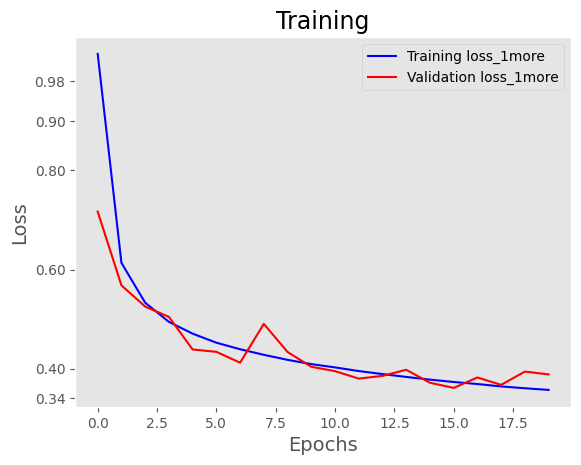

In [ ]:
loss_1more = h_1more.history['loss']
val_loss_1more = h_1more.history['val_loss']

# plot loss and accuracy
epochs_1more = range(len(loss_1more))

plt.style.use('ggplot')
plt.plot(epochs_1more, loss_1less, 'blue', label='Training loss_1more')
plt.plot(epochs_1more, val_loss_1more, 'red', label='Validation loss_1more')
plt.yticks((0.34,0.4,0.6,0.8,0.9,0.98))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='upper right')
plt.grid(None)

plt.show()

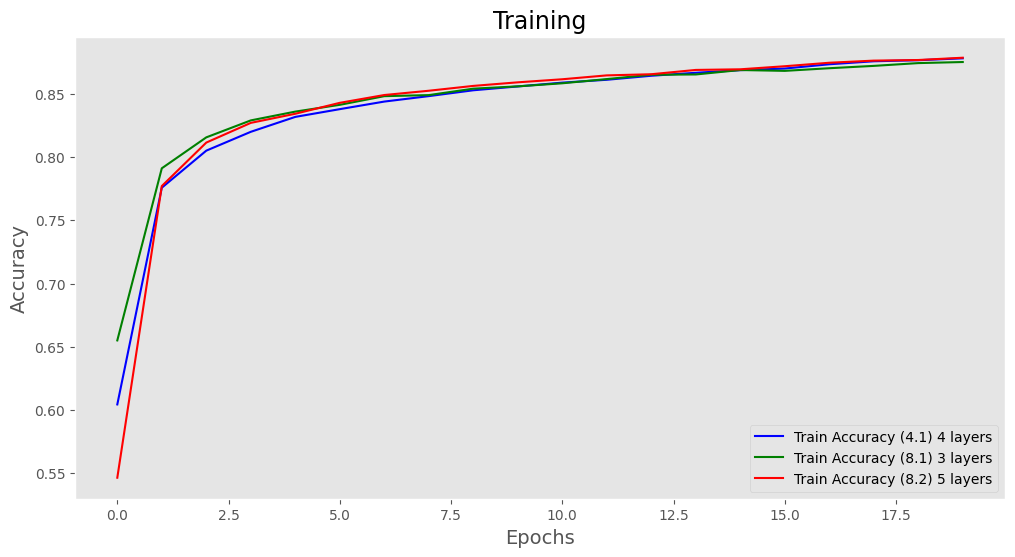

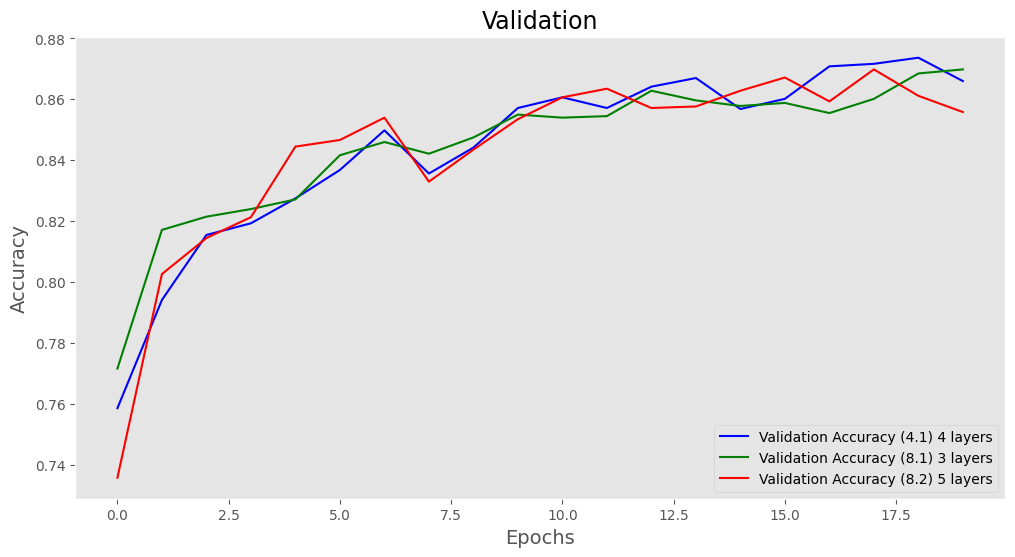

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy (4.1) 4 layers')
plt.plot(epochs, accuracy_1less, 'g-', label='Train Accuracy (8.1) 3 layers')
plt.plot(epochs, accuracy_1more, 'r-', label='Train Accuracy (8.2) 5 layers')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.figure(figsize=(12, 6))
plt.plot(epochs, val_accuracy, 'b-', label='Validation Accuracy (4.1) 4 layers')
plt.plot(epochs, val_accuracy_1less, 'g-', label='Validation Accuracy (8.1) 3 layers')
plt.plot(epochs, val_accuracy_1more, 'r-', label='Validation Accuracy (8.2) 5 layers')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Validation', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



# 9.1 Dropout of ratio 0.25

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4260 - loss: 1.6667 - val_accuracy: 0.7260 - val_loss: 0.7187
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7182 - loss: 0.7743 - val_accuracy: 0.7860 - val_loss: 0.5868
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7728 - loss: 0.6465 - val_accuracy: 0.8075 - val_loss: 0.5320
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.5866 - val_accuracy: 0.8253 - val_loss: 0.4922
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8108 - loss: 0.5420 - val_accuracy: 0.8232 - val_loss: 0.4774
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8212 - loss: 0.5111 - val_accuracy: 0.8357 - val_loss: 0.4477
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8280 - loss: 0.4907 - val_accuracy: 0.8387 - val_loss: 0.4394
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8319 - loss: 0.4744 - val_accuracy: 0.

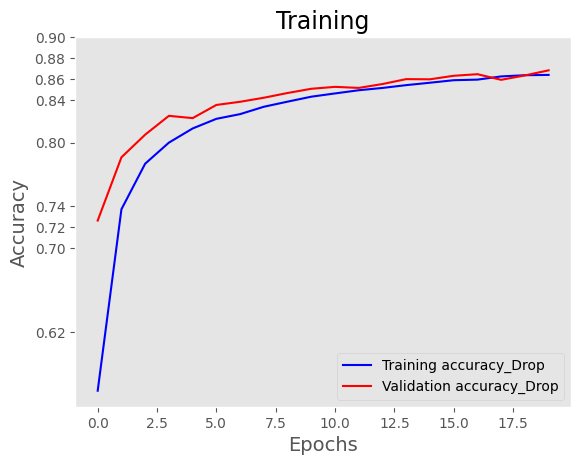

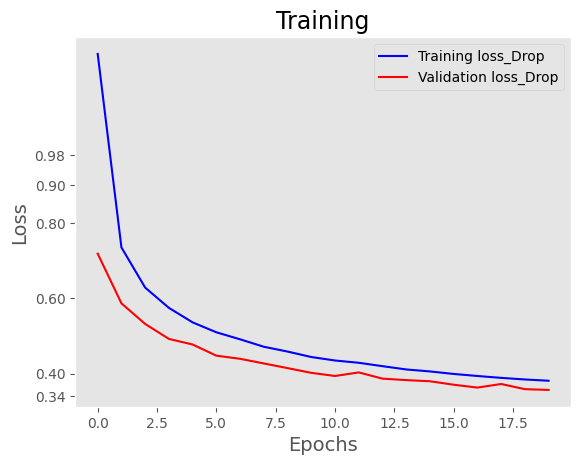

In [ ]:
dnnModel_Drop = models.Sequential()

# Layer 1 = hidden layer
dnnModel_Drop.add(layers.Dense(50, activation='relu', input_shape=(28*28,)))

# Layer 2 = hidden layer
dnnModel_Drop.add(layers.Dense(60, activation='relu'))

# Added Dropout of 0.25 to layer 2
dnnModel_Drop.add(layers.Dropout(0.25))

# Layer 3 = hidden layer
dnnModel_Drop.add(layers.Dense(30, activation='relu'))

# Layer 4 = output layer
dnnModel_Drop.add(layers.Dense(10, activation='softmax'))

# summary
dnnModel_Drop.summary()

# train
dnnModel_Drop.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
h_Drop  = dnnModel_Drop.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)
testLoss_Drop, testAccuracy_Drop = dnnModel_Drop.evaluate( X_test, y_test)
print('Final training loss \t', h_Drop.history['loss'][-1])
print('Final training accuracy ', h_Drop.history['accuracy'][-1])
print('Final validation loss \t', h_Drop.history['val_loss'][-1])
print('Final validation accuracy ', h_Drop.history['val_accuracy'][-1])
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue_Drop = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted_Drop = dnnModel_Drop.predict(X_test)
Ypredicted_Drop = np.argmax(np.round(Ypredicted_Drop),axis=1)
accuracy_Drop = h_Drop.history['accuracy']
val_accuracy_Drop = h_Drop.history['val_accuracy']

# plot loss and accuracy
epochs_Drop = range(len(accuracy_Drop))

plt.style.use('ggplot')
plt.plot(epochs_Drop, accuracy_Drop, 'blue', label='Training accuracy_Drop')
plt.plot(epochs_Drop, val_accuracy_Drop, 'red', label='Validation accuracy_Drop')
plt.yticks((0.62,0.7,0.72,0.74,0.8,0.84,0.86,0.88,0.9))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()
loss_Drop = h_Drop.history['loss']
val_loss_Drop = h_Drop.history['val_loss']

# plot loss and accuracy
epochs_Drop = range(len(loss_Drop))

plt.style.use('ggplot')
plt.plot(epochs_Drop, loss_Drop, 'blue', label='Training loss_Drop')
plt.plot(epochs_Drop, val_loss_Drop, 'red', label='Validation loss_Drop')
plt.yticks((0.34,0.4,0.6,0.8,0.9,0.98))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='upper right')
plt.grid(None)

plt.show()

# 9.2 Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3500 - loss: 1.7627 - val_accuracy: 0.7378 - val_loss: 0.7587
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7176 - loss: 0.8031 - val_accuracy: 0.7933 - val_loss: 0.6074
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7749 - loss: 0.6548 - val_accuracy: 0.8138 - val_loss: 0.5544
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7983 - loss: 0.6003 - val_accuracy: 0.8292 - val_loss: 0.5156
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8151 - loss: 0.5618 - val_accuracy: 0.8300 - val_loss: 0.4966
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8211 - loss: 0.5430 - val_accuracy: 0.8352 - val_loss: 0.4776
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8298 - loss: 0.5134 - val_accuracy: 0.8438 - val_loss: 0.4584
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8344 - loss: 0.4985 - val_accuracy: 0.

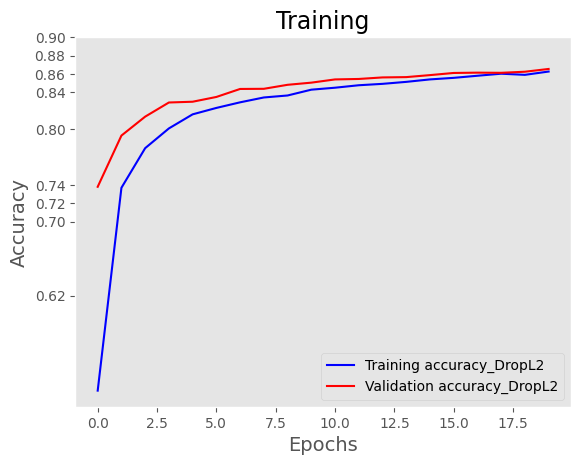

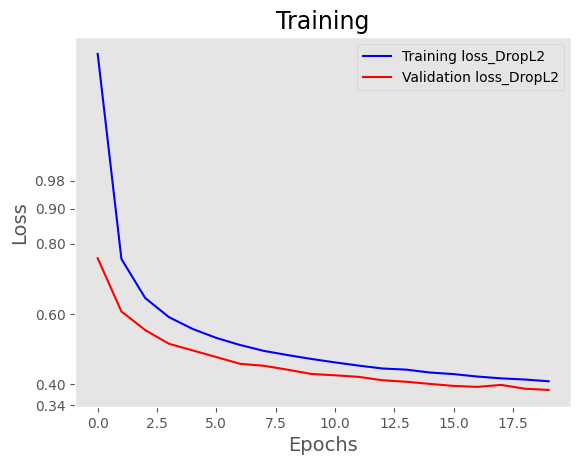

In [ ]:
dnnModel_DropL2 = models.Sequential()

# Layer 1: Hidden layer with L2 regularization
dnnModel_DropL2.add(layers.Dense(50, activation='relu',
                         input_shape=(28*28,),
                         kernel_regularizer=regularizers.l2(1e-04)))  # L2 penalty added

# Layer 2: Hidden layer with L2 regularization
dnnModel_DropL2.add(layers.Dense(60, activation='relu',
                         kernel_regularizer=regularizers.l2(1e-04)))  # L2 penalty added

# Dropout after Layer 2
dnnModel_DropL2.add(layers.Dropout(0.25))  # 25% dropout

# Layer 3: Hidden layer with L2 regularization
dnnModel_DropL2.add(layers.Dense(30, activation='relu',
                         kernel_regularizer=regularizers.l2(1e-04)))  # L2 penalty added

# Layer 4: Output layer (no regularization)
dnnModel_DropL2.add(layers.Dense(10, activation='softmax'))

# summary
dnnModel_DropL2.summary()

# train
dnnModel_DropL2.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
h_DropL2  = dnnModel_DropL2.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)
testLoss_DropL2, testAccuracy_DropL2 = dnnModel_DropL2.evaluate( X_test, y_test)
print('Final training loss \t', h_DropL2.history['loss'][-1])
print('Final training accuracy ', h_DropL2.history['accuracy'][-1])
print('Final validation loss \t', h_DropL2.history['val_loss'][-1])
print('Final validation accuracy ', h_DropL2.history['val_accuracy'][-1])
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue_DropL2 = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted_DropL2 = dnnModel_DropL2.predict(X_test)
Ypredicted_DropL2 = np.argmax(np.round(Ypredicted_DropL2),axis=1)
accuracy_DropL2 = h_DropL2.history['accuracy']
val_accuracy_DropL2 = h_DropL2.history['val_accuracy']

# plot loss and accuracy
epochs_DropL2 = range(len(accuracy_DropL2))

plt.style.use('ggplot')
plt.plot(epochs_DropL2, accuracy_DropL2, 'blue', label='Training accuracy_DropL2')
plt.plot(epochs_DropL2, val_accuracy_DropL2, 'red', label='Validation accuracy_DropL2')
plt.yticks((0.62,0.7,0.72,0.74,0.8,0.84,0.86,0.88,0.9))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()
loss_DropL2 = h_DropL2.history['loss']
val_loss_DropL2 = h_DropL2.history['val_loss']

# plot loss and accuracy
epochs_DropL2 = range(len(loss_DropL2))

plt.style.use('ggplot')
plt.plot(epochs_DropL2, loss_DropL2, 'blue', label='Training loss_DropL2')
plt.plot(epochs_DropL2, val_loss_DropL2, 'red', label='Validation loss_DropL2')
plt.yticks((0.34,0.4,0.6,0.8,0.9,0.98))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='upper right')
plt.grid(None)

plt.show()

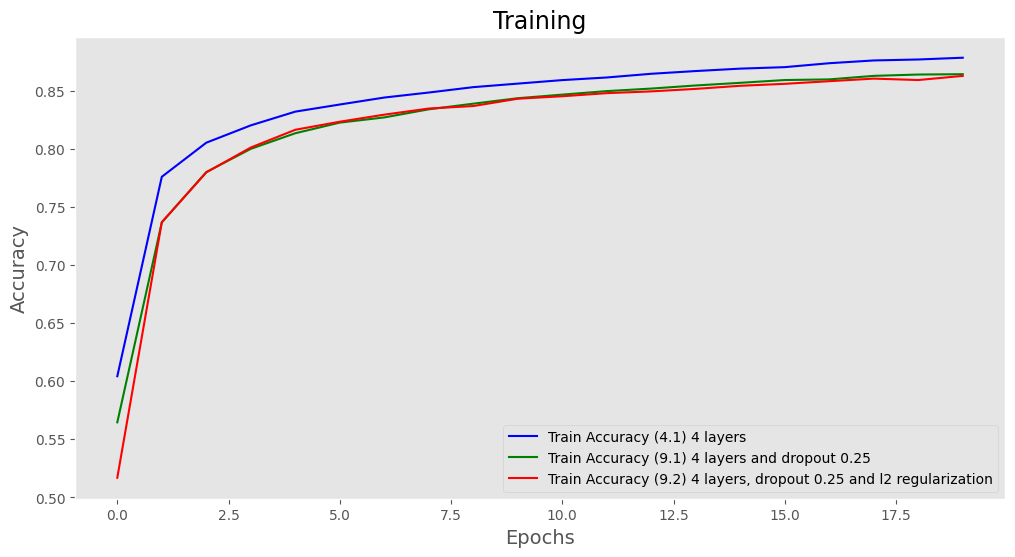

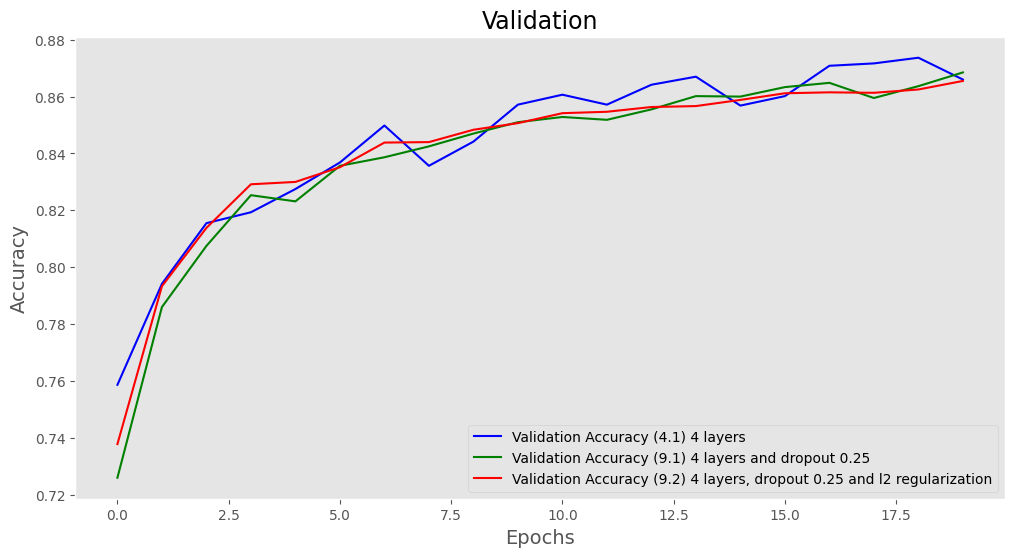

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy (4.1) 4 layers')
plt.plot(epochs, accuracy_Drop, 'g-', label='Train Accuracy (9.1) 4 layers and dropout 0.25')
plt.plot(epochs, accuracy_DropL2, 'r-', label='Train Accuracy (9.2) 4 layers, dropout 0.25 and l2 regularization')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.figure(figsize=(12, 6))
plt.plot(epochs, val_accuracy, 'b-', label='Validation Accuracy (4.1) 4 layers')
plt.plot(epochs, val_accuracy_Drop, 'g-', label='Validation Accuracy (9.1) 4 layers and dropout 0.25')
plt.plot(epochs, val_accuracy_DropL2, 'r-', label='Validation Accuracy (9.2) 4 layers, dropout 0.25 and l2 regularization')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Validation', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


# 10.1 RMSProp with your choice of hyper parameters

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8495 - loss: 0.4247 - val_accuracy: 0.8520 - val_loss: 0.4330
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8647 - loss: 0.3676 - val_accuracy: 0.8690 - val_loss: 0.3671
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8759 - loss: 0.3468 - val_accuracy: 0.8663 - val_loss: 0.3624
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8827 - loss: 0.3233 - val_accuracy: 0.8860 - val_loss: 0.3206
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8870 - loss: 0.3057 - val_accuracy: 0.8508 - val_loss: 0.4049
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8927 - loss: 0.2930 - val_accuracy: 0.8662 - val_loss: 0.3688
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8962 - loss: 0.2802 - val_accuracy: 0.8737 - val_loss: 0.3523
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8954 - loss: 0.2836 - val_accuracy: 0.

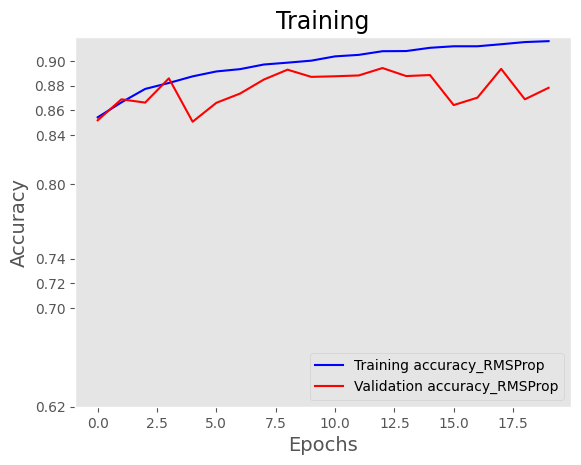

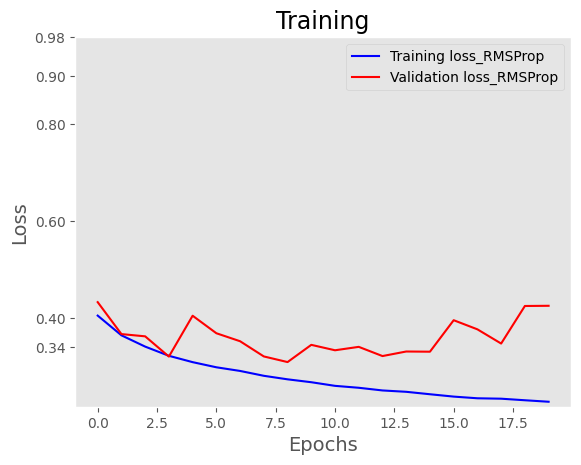

In [ ]:
# Hyperparameters
learning_rate = 0.001
rho = 0.9                # Decay rate for moving average
epsilon = 1e-7           # Numerical stability term

# Compile model
dnnModel_RMSProp = dnnModel
dnnModel_RMSProp.compile(
    optimizer=RMSprop(learning_rate=learning_rate, rho=rho, epsilon=epsilon),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

h_RMSProp  = dnnModel_RMSProp.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)
testLoss_RMSProp, testAccuracy_RMSProp = dnnModel_DropL2.evaluate( X_test, y_test)
print('Final training loss \t', h_RMSProp.history['loss'][-1])
print('Final training accuracy ', h_RMSProp.history['accuracy'][-1])
print('Final validation loss \t', h_RMSProp.history['val_loss'][-1])
print('Final validation accuracy ', h_RMSProp.history['val_accuracy'][-1])
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue_RMSProp = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted_RMSProp = dnnModel_RMSProp.predict(X_test)
Ypredicted_RMSProp = np.argmax(np.round(Ypredicted_RMSProp),axis=1)
accuracy_RMSProp = h_RMSProp.history['accuracy']
val_accuracy_RMSProp = h_RMSProp.history['val_accuracy']

# plot loss and accuracy
epochs_RMSProp = range(len(accuracy_RMSProp))

plt.style.use('ggplot')
plt.plot(epochs_RMSProp, accuracy_RMSProp, 'blue', label='Training accuracy_RMSProp')
plt.plot(epochs_RMSProp, val_accuracy_RMSProp, 'red', label='Validation accuracy_RMSProp')
plt.yticks((0.62,0.7,0.72,0.74,0.8,0.84,0.86,0.88,0.9))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()
loss_RMSProp = h_RMSProp.history['loss']
val_loss_RMSProp = h_RMSProp.history['val_loss']

# plot loss and accuracy
epochs_RMSProp = range(len(loss_RMSProp))

plt.style.use('ggplot')
plt.plot(epochs_RMSProp, loss_RMSProp, 'blue', label='Training loss_RMSProp')
plt.plot(epochs_RMSProp, val_loss_RMSProp, 'red', label='Validation loss_RMSProp')
plt.yticks((0.34,0.4,0.6,0.8,0.9,0.98))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='upper right')
plt.grid(None)

plt.show()

# 10.2 Adam with your choice of hyper parameters

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9171 - loss: 0.2269 - val_accuracy: 0.8862 - val_loss: 0.3403
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9203 - loss: 0.2111 - val_accuracy: 0.8833 - val_loss: 0.3486
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2061 - val_accuracy: 0.8903 - val_loss: 0.3504
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9268 - loss: 0.1966 - val_accuracy: 0.8955 - val_loss: 0.3344
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9284 - loss: 0.1903 - val_accuracy: 0.8922 - val_loss: 0.3393
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9280 - loss: 0.1889 - val_accuracy: 0.8927 - val_loss: 0.3304
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9293 - loss: 0.1866 - val_accuracy: 0.8943 - val_loss: 0.3346
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9312 - loss: 0.1830 - val_accuracy: 0.

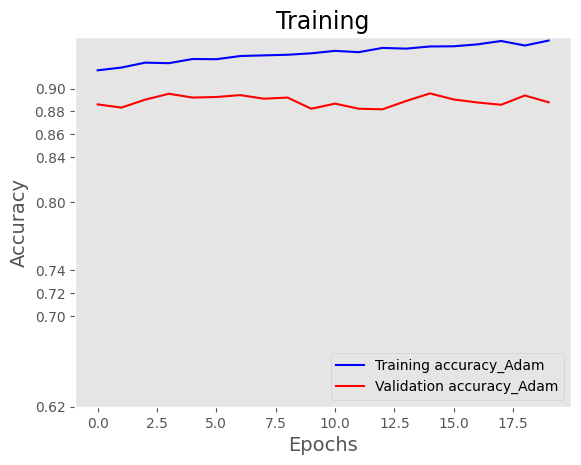

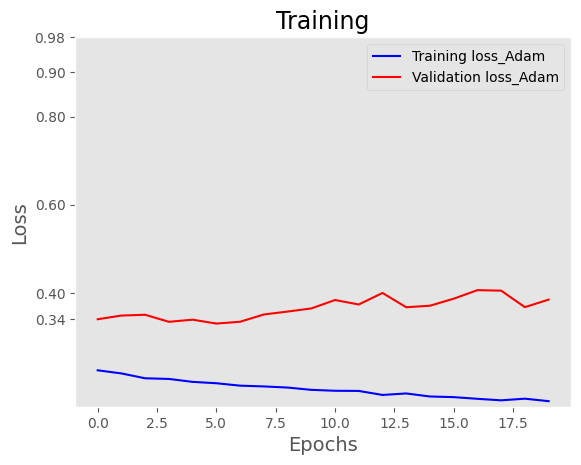

In [50]:

# Hyperparameters
learning_rate = 0.001
beta_1 = 0.9            # Exponential decay rate for 1st moment estimates
beta_2 = 0.999          # Exponential decay rate for 2nd moment estimates
epsilon = 1e-7

# Compile model
dnnModel_Adam = dnnModel
dnnModel_Adam.compile(
    optimizer=Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


h_Adam  = dnnModel_Adam.fit( X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)
testLoss_Adam, testAccuracy_Adam = dnnModel_DropL2.evaluate( X_test, y_test)
print('Final training loss \t', h_Adam.history['loss'][-1])
print('Final training accuracy ', h_Adam.history['accuracy'][-1])
print('Final validation loss \t', h_Adam.history['val_loss'][-1])
print('Final validation accuracy ', h_Adam.history['val_accuracy'][-1])
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue_Adam = np.argmax(y_test,axis = 1)

# Predict Labels
Ypredicted_Adam = dnnModel_Adam.predict(X_test)
Ypredicted_Adam = np.argmax(np.round(Ypredicted_Adam),axis=1)
accuracy_Adam = h_Adam.history['accuracy']
val_accuracy_Adam = h_Adam.history['val_accuracy']

# plot loss and accuracy
epochs_Adam = range(len(accuracy_Adam))

plt.style.use('ggplot')
plt.plot(epochs_Adam, accuracy_Adam, 'blue', label='Training accuracy_Adam')
plt.plot(epochs_Adam, val_accuracy_Adam, 'red', label='Validation accuracy_Adam')
plt.yticks((0.62,0.7,0.72,0.74,0.8,0.84,0.86,0.88,0.9))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.show()
loss_Adam = h_Adam.history['loss']
val_loss_Adam = h_Adam.history['val_loss']

# plot loss and accuracy
epochs_Adam = range(len(loss_Adam))

plt.style.use('ggplot')
plt.plot(epochs_Adam, loss_Adam, 'blue', label='Training loss_Adam')
plt.plot(epochs_Adam, val_loss_Adam, 'red', label='Validation loss_Adam')
plt.yticks((0.34,0.4,0.6,0.8,0.9,0.98))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='upper right')
plt.grid(None)

plt.show()

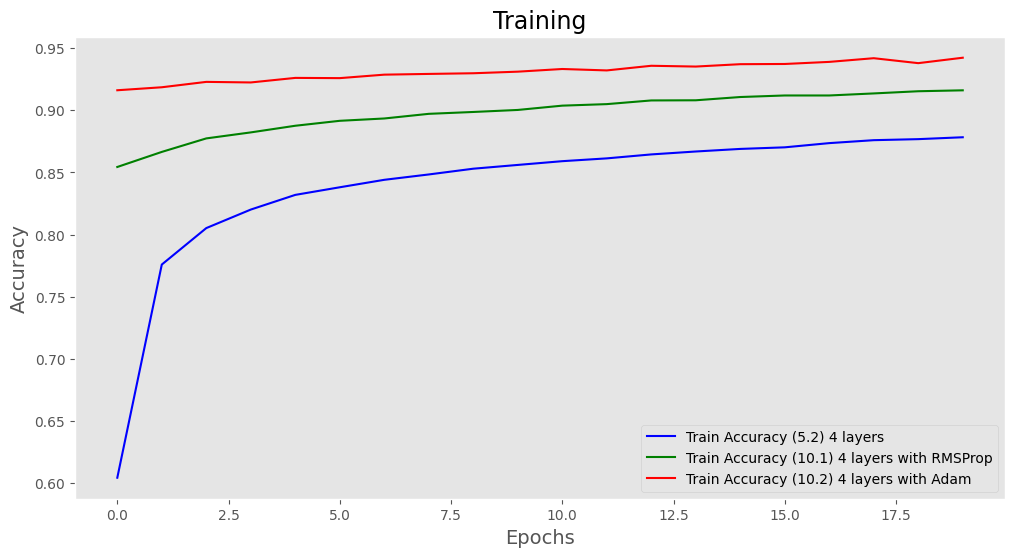

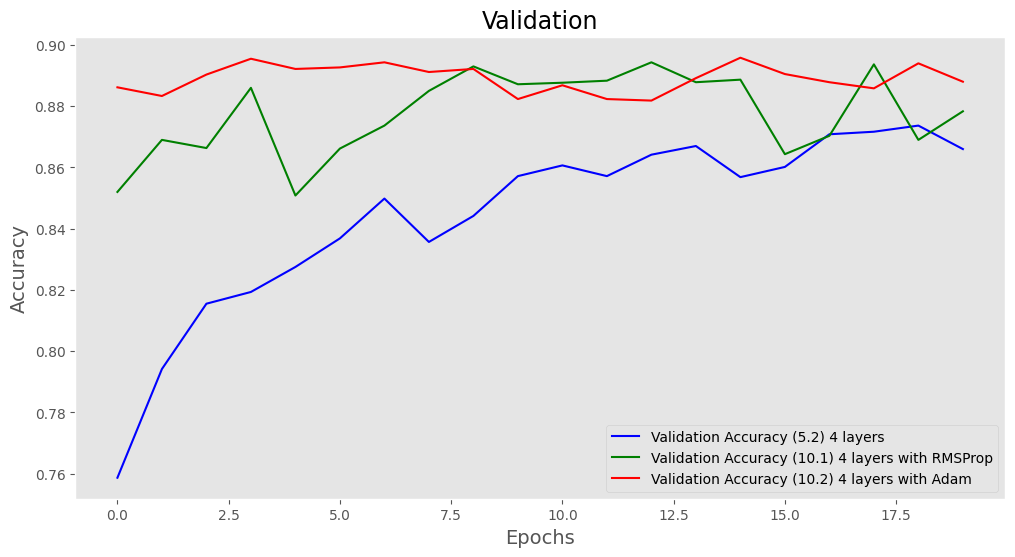

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy (5.2) 4 layers')
plt.plot(epochs, accuracy_RMSProp, 'g-', label='Train Accuracy (10.1) 4 layers with RMSProp')
plt.plot(epochs, accuracy_Adam, 'r-', label='Train Accuracy (10.2) 4 layers with Adam')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.figure(figsize=(12, 6))
plt.plot(epochs, val_accuracy, 'b-', label='Validation Accuracy (5.2) 4 layers')
plt.plot(epochs, val_accuracy_RMSProp, 'g-', label='Validation Accuracy (10.1) 4 layers with RMSProp')
plt.plot(epochs, val_accuracy_Adam, 'r-', label='Validation Accuracy (10.2) 4 layers with Adam')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Validation', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


| Variant            | Train Loss | Train Acc | Val Loss | Val Acc | Notes                                      |
|--------------------|------------|-----------|----------|---------|--------------------------------------------|
| Baseline (4,5)     | 0.3484     | 0.8768    | 0.3812   | 0.8613  | Standard architecture                      |
| 8.1 (1 less)       | 0.3582     | 0.8732    | 0.3774   | 0.8670  | Slight underfitting                        |
| 8.2 (1 more)       | 0.3397     | 0.8783    | 0.3743   | 0.8643  | Slight improvement, marginal capacity gain |
| 9.1 (Dropout)      | 0.3868     | 0.8633    | 0.3578   | 0.8645  | Better generalization, less overfitting    |
| 9.2 (Dropout + L2) | 0.4049     | 0.8637    | 0.3899   | 0.8625  | Over-regularization, possible underfitting |
| 10.1 (RMSProp)     | 0.2293     | 0.9150    | 0.3615   | 0.8897  | Strong optimizer, high validation accuracy |
| 10.2 (Adam)        | 0.1573     | 0.9403    | 0.3681   | 0.8928  | Best overall, highest accuracy             |






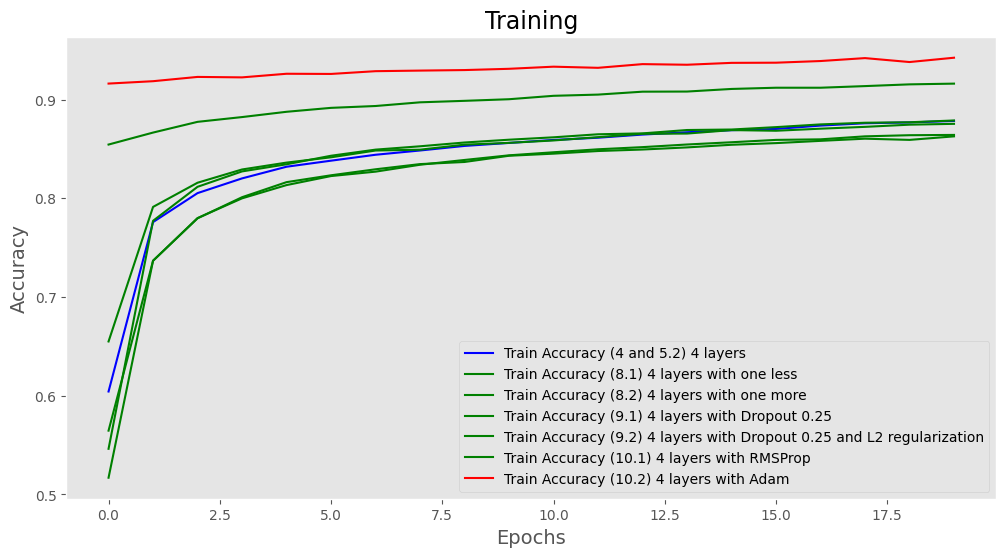

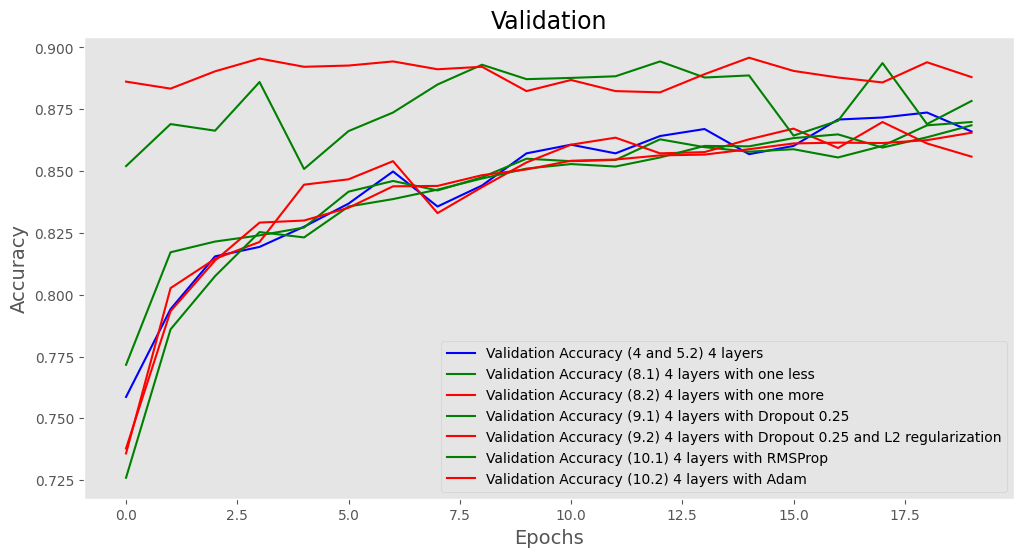

In [52]:
##---------Type the code below this line------------------##

plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy (4 and 5.2) 4 layers')
plt.plot(epochs, accuracy_1less, 'g-', label='Train Accuracy (8.1) 4 layers with one less')
plt.plot(epochs, accuracy_1more, 'g-', label='Train Accuracy (8.2) 4 layers with one more')
plt.plot(epochs, accuracy_Drop, 'g-', label='Train Accuracy (9.1) 4 layers with Dropout 0.25')
plt.plot(epochs, accuracy_DropL2, 'g-', label='Train Accuracy (9.2) 4 layers with Dropout 0.25 and L2 regularization')
plt.plot(epochs, accuracy_RMSProp, 'g-', label='Train Accuracy (10.1) 4 layers with RMSProp')
plt.plot(epochs, accuracy_Adam, 'r-', label='Train Accuracy (10.2) 4 layers with Adam')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)

plt.figure(figsize=(12, 6))
plt.plot(epochs, val_accuracy, 'b-', label='Validation Accuracy (4 and 5.2) 4 layers')
plt.plot(epochs, val_accuracy_1less, 'g-', label='Validation Accuracy (8.1) 4 layers with one less')
plt.plot(epochs, val_accuracy_1more, 'r-', label='Validation Accuracy (8.2) 4 layers with one more')
plt.plot(epochs, val_accuracy_Drop, 'g-', label='Validation Accuracy (9.1) 4 layers with Dropout 0.25')
plt.plot(epochs, val_accuracy_DropL2, 'r-', label='Validation Accuracy (9.2) 4 layers with Dropout 0.25 and L2 regularization')
plt.plot(epochs, val_accuracy_RMSProp, 'g-', label='Validation Accuracy (10.1) 4 layers with RMSProp')
plt.plot(epochs, val_accuracy_Adam, 'r-', label='Validation Accuracy (10.2) 4 layers with Adam')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Validation', fontsize=17)
plt.legend(loc='lower right')
plt.grid(None)
plt.show()

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck